In [ ]:
from collections import defaultdict
import sys
import numpy as np
import gym
import Configuration.config as cfg
from gym_atena.envs.atena_env_cont import ATENAEnvCont



Configuration loaded with:
  - humanity_coeff: 1.0
  - diversity_coeff: 2.0
  - kl_coeff: 1.5
  - compaction_coeff: 2.0
  - adam_lr: 0.0003
  - ppo_gamma: 0.995
  - ppo_lambda: 0.97
Registering ATENAcont-v0 environment


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


✅ Using Snorkel compatibility adapter


In [ ]:

from Evaluation.notebook_utils import *
from live_recommender_agent import TFRecommenderAgent, find_latest_trained_model

%matplotlib inline


Configuration loaded with:
  - humanity_coeff: 1.0
  - diversity_coeff: 2.0
  - kl_coeff: 1.5
  - compaction_coeff: 2.0
  - adam_lr: 0.0003
  - ppo_gamma: 0.995
  - ppo_lambda: 0.97
✅ REWARD STABILIZER: DISABLED (stable mode like train_ipdate-1009-18:54.png)


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


# Agent Sessions for Analysis

This notebook allows analysts to define specific action sequences and analyze how the agent performs them.

Use this to:
- Test specific exploration strategies
- Compare different action sequences
- Analyze agent behavior on specific paths


## Setup Environment


In [ ]:
# Create environment
env = gym.make(env_d)

# Choose dataset
dataset_number = 0
env.reset(dataset_number=dataset_number)

print(f"Environment ready for dataset {dataset_number}")


🔄 Loading datasets for schema: NETWORKING
































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...


✅ Datasets loaded successfully!
🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[0 epochs]: TRAIN:[loss=99.960]
INFO:root:[10 epochs]: TRAIN:[loss=37.396]
INFO:root:[20 epochs]: TRAIN:[loss=11.454]
INFO:root:[30 epochs]: TRAIN:[loss=5.136]
INFO:root:[40 epochs]: TRAIN:[loss=5.965]
INFO:root:[50 epochs]: TRAIN:[loss=5.304]
INFO:root:[60 epochs]: TRAIN:[loss=4.671]
INFO:root:[70 epochs]: TRAIN:[loss=4.628]
INFO:root:[80 epochs]: TRAIN:[loss=4.605]
INFO:root:[90 epochs]: TRAIN:[loss=4.582]
INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
Environment ready for dataset 0


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Define Action Sequences

Define specific action sequences to test. Action format:
- `[action_type, column_idx, operator_idx, filter_term, agg_func_idx, agg_column_idx]`
- action_type: 0=back, 1=filter, 2=group


In [ ]:
# Example Session 0: Group-heavy exploration
action_vecs_0 = [
    [2, 3, 0, 0.0, 0, 0],  # Group by column 3
    [2, 2, 0, 0.0, 0, 0],  # Group by column 2
    [2, 5, 0, 0.0, 0, 0],  # Group by column 5
    [1, 4, 8, -0.49, 0, 0],  # Filter on column 4
    [0, 0, 0, 0.0, 0, 0],  # Back
    [2, 10, 0, 0.0, 0, 0],  # Group by column 10
]

filter_terms_lst_0 = [
    None,
    None,
    None,
    'FL',  # Filter term for action 3
    None,
    None,
]

# Example Session 1: Filter-first exploration
action_vecs_1 = [
    [1, 1, 0, 0.5, 0, 0],  # Filter on column 1
    [2, 3, 0, 0.0, 0, 0],  # Group by column 3
    [2, 2, 0, 0.0, 0, 0],  # Group by column 2
    [0, 0, 0, 0.0, 0, 0],  # Back
    [1, 4, 8, -0.46, 0, 0],  # Filter on column 4
]

filter_terms_lst_1 = [
    'AA',  # Filter term for action 0
    None,
    None,
    None,
    'NY',  # Filter term for action 4
]

# Store sessions
sessions = [
    {'name': 'Group-heavy', 'actions': action_vecs_0, 'filters': filter_terms_lst_0},
    {'name': 'Filter-first', 'actions': action_vecs_1, 'filters': filter_terms_lst_1},
]

print(f"Defined {len(sessions)} action sequences")


Defined 2 action sequences


## Run and Analyze Each Session



Analyzing: Group-heavy



/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,TCP,8888?34374 [ACK] Seq=1 Ack=1 Win=65535 Len=0 T...,192.168.1.1,192.168.1.122,66,2013-06-02 10:19:14,34374,8888,0
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.185, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.9806288470171391
   total_interestingness: 1.9806288470171391
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.185, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.630195
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.630195
🎯 Snorkel humanity: -0.630195


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...
INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=95.340]
INFO:root:[10 epochs]: TRAIN:[loss=36.188]
INFO:root:[20 epochs]: TRAIN:[loss=12.109]
INFO:root:[30 epochs]: TRAIN:[loss=4.889]


🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:[40 epochs]: TRAIN:[loss=5.204]
INFO:root:[50 epochs]: TRAIN:[loss=5.087]
INFO:root:[60 epochs]: TRAIN:[loss=4.587]
INFO:root:[70 epochs]: TRAIN:[loss=4.428]
INFO:root:[80 epochs]: TRAIN:[loss=4.410]
INFO:root:[90 epochs]: TRAIN:[loss=4.387]
INFO:root:Finished Training


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


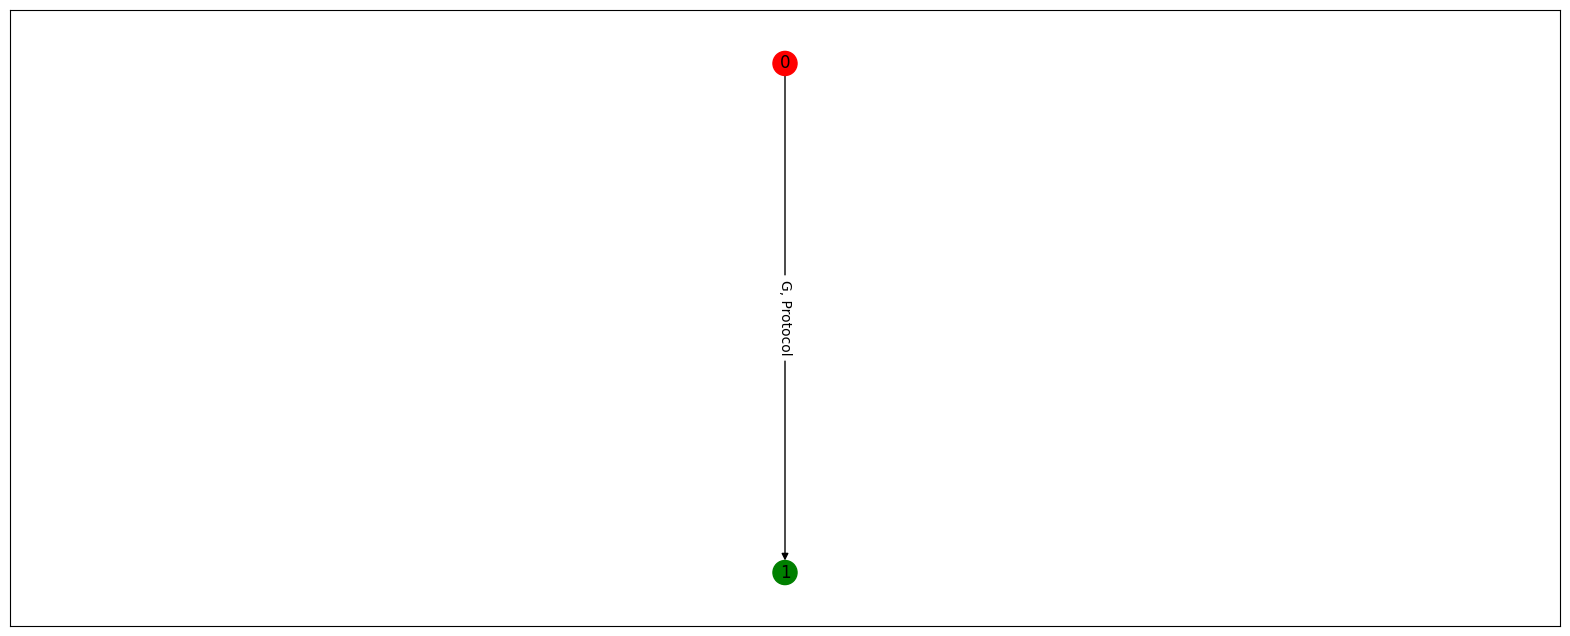

,packet_number
highest_layer,
ARP,4
ICMP,7677
TCP,967


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.465, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.9139110604891028
   total_interestingness: 1.9139110604891028
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.465, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.069763
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.069763
🎯 Snorkel humanity: -0.069763


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


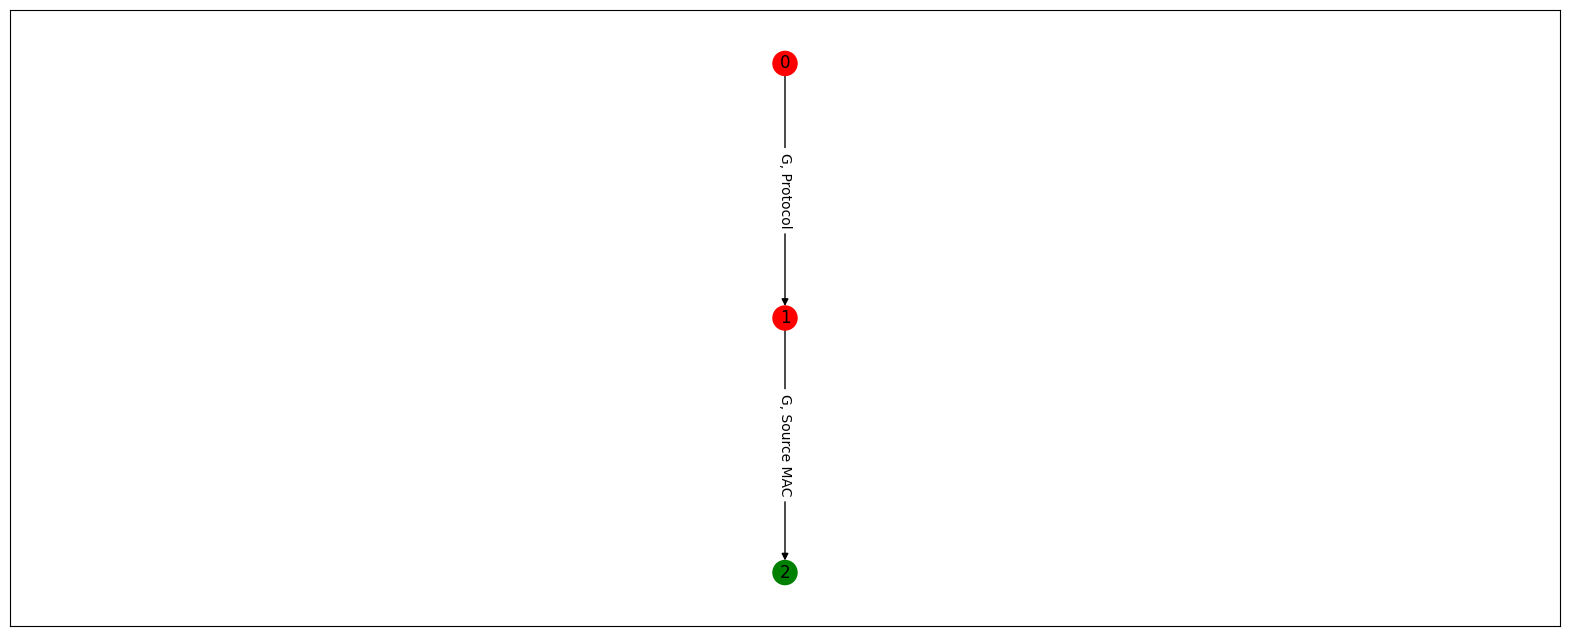

packet_number
highest_layer eth_src                         
ARP           00:0c:29:54:bf:79              2
              00:26:b9:2b:0b:59              2
ICMP          00:0c:29:54:bf:79           7304
              00:26:b9:2b:0b:59            373
TCP           00:0c:29:54:bf:79            528
              00:26:b9:2b:0b:59            439

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.088, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.01753548185912183
   total_interestingness: 0.01753548185912183
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.088, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.823071
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.823071
🎯 Snorkel humanity: -0.823071


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


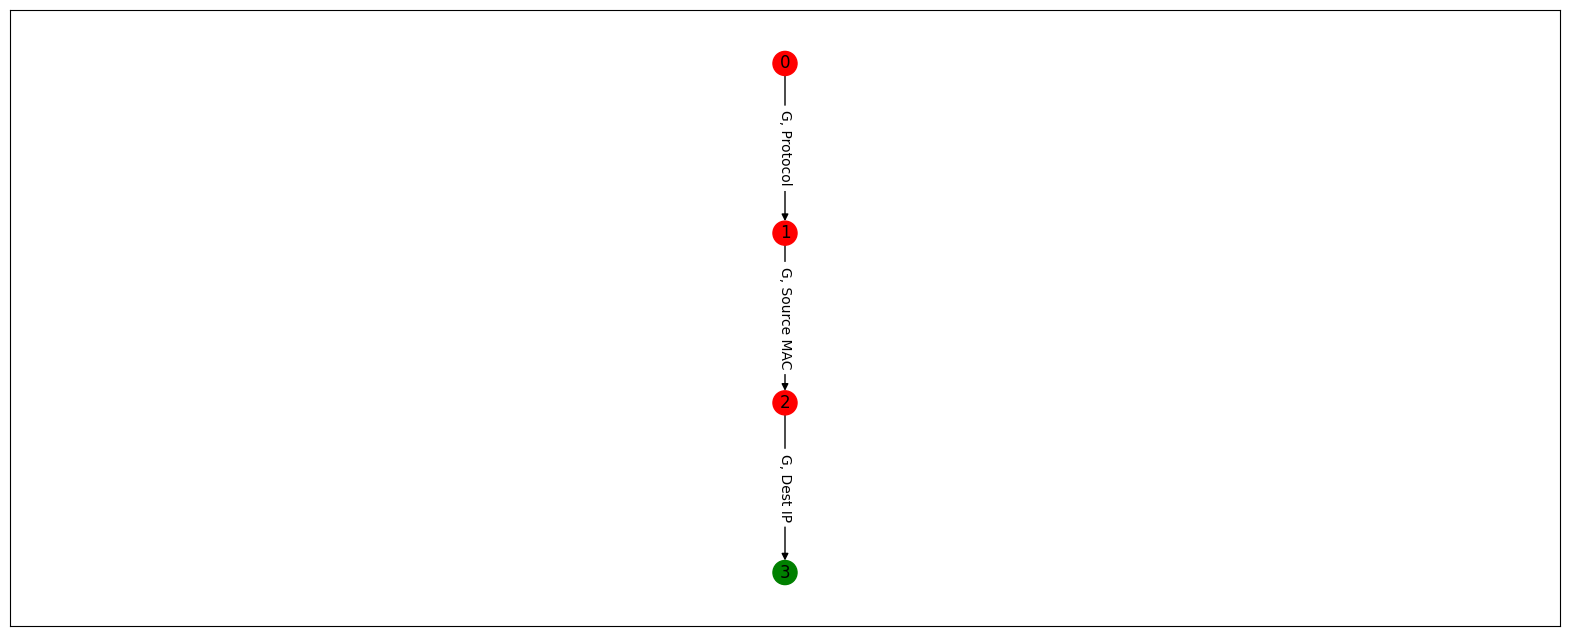

packet_number
highest_layer eth_src           ip_dst                      
ARP           00:0c:29:54:bf:79 0.0.0.0                    2
              00:26:b9:2b:0b:59 0.0.0.0                    2
ICMP          00:0c:29:54:bf:79 1.2.3.4                    1
                                82.108.0.109               2
                                82.108.0.11                1
...                                                      ...
TCP           00:0c:29:54:bf:79 82.108.89.202              2
                                82.108.9.25                3
                                82.108.97.145              5
                                82.108.99.209              6
              00:26:b9:2b:0b:59 192.168.1.122            439

[3838 rows x 1 columns]

🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.2263617142904655
   compaction_gain: 0
   total_interestingness: 1.2263617142904655
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


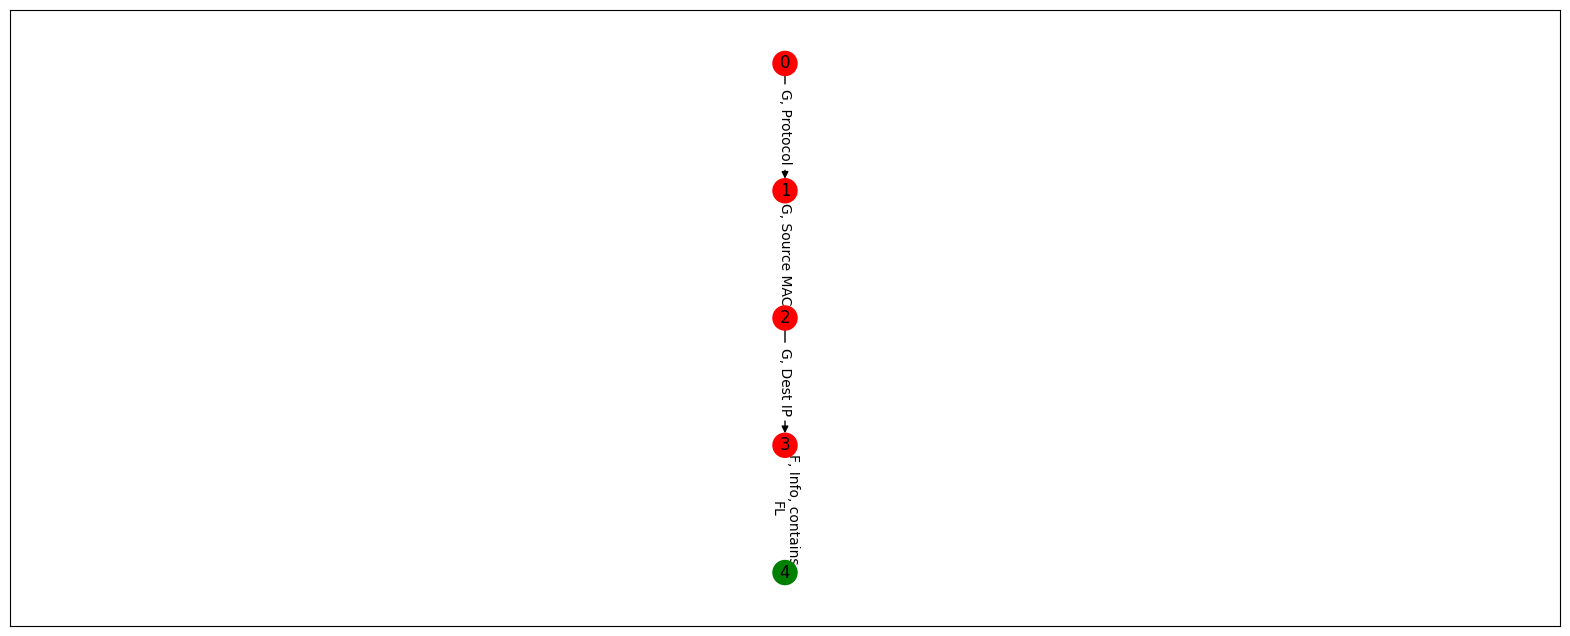

,,,packet_number
highest_layer,eth_src,ip_dst,


🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.113, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.113, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.774690
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.774690
🎯 Snorkel humanity: -0.774690


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


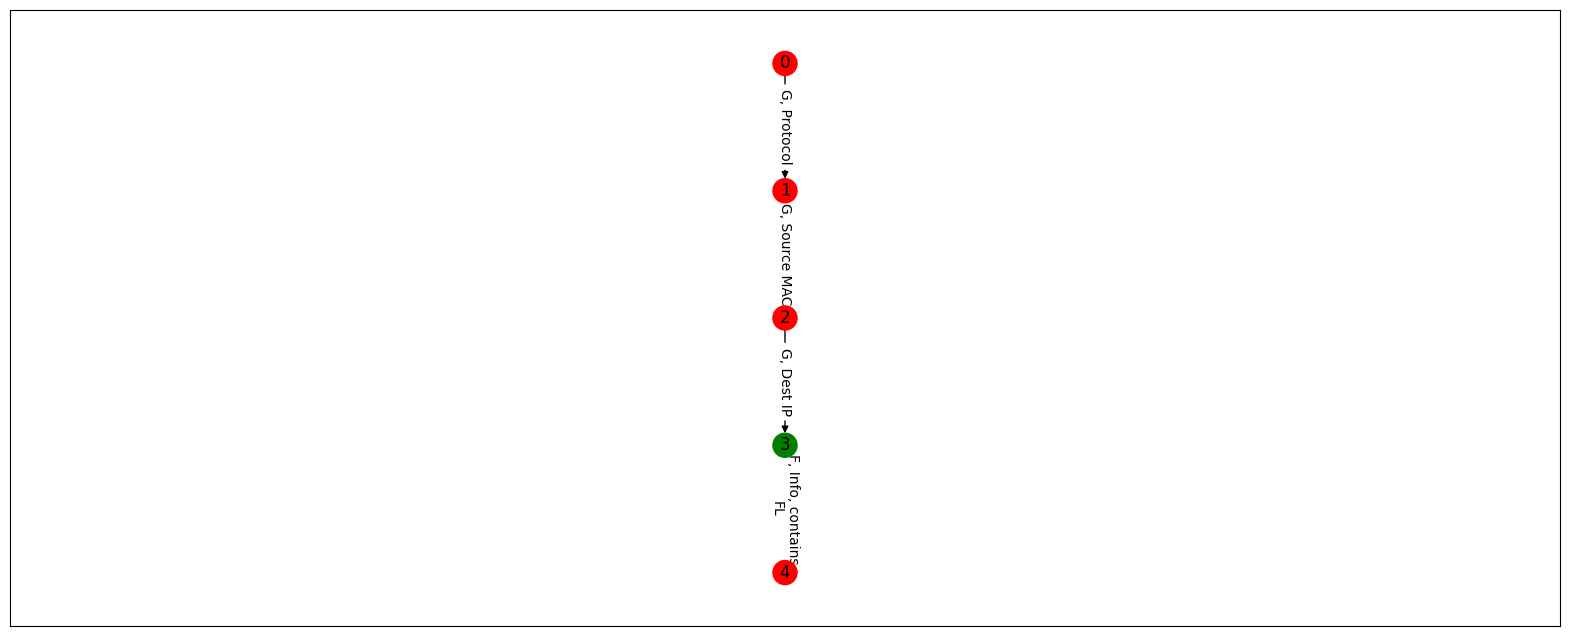

INFO:atena_env_cont:actions:[[np.int64(2), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(8), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(10), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]]


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.374, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.015584785308754097
   total_interestingness: 0.015584785308754097
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.374, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.251881
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.251881
🎯 Snorkel humanity: -0.251881


🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.000, std=0.000


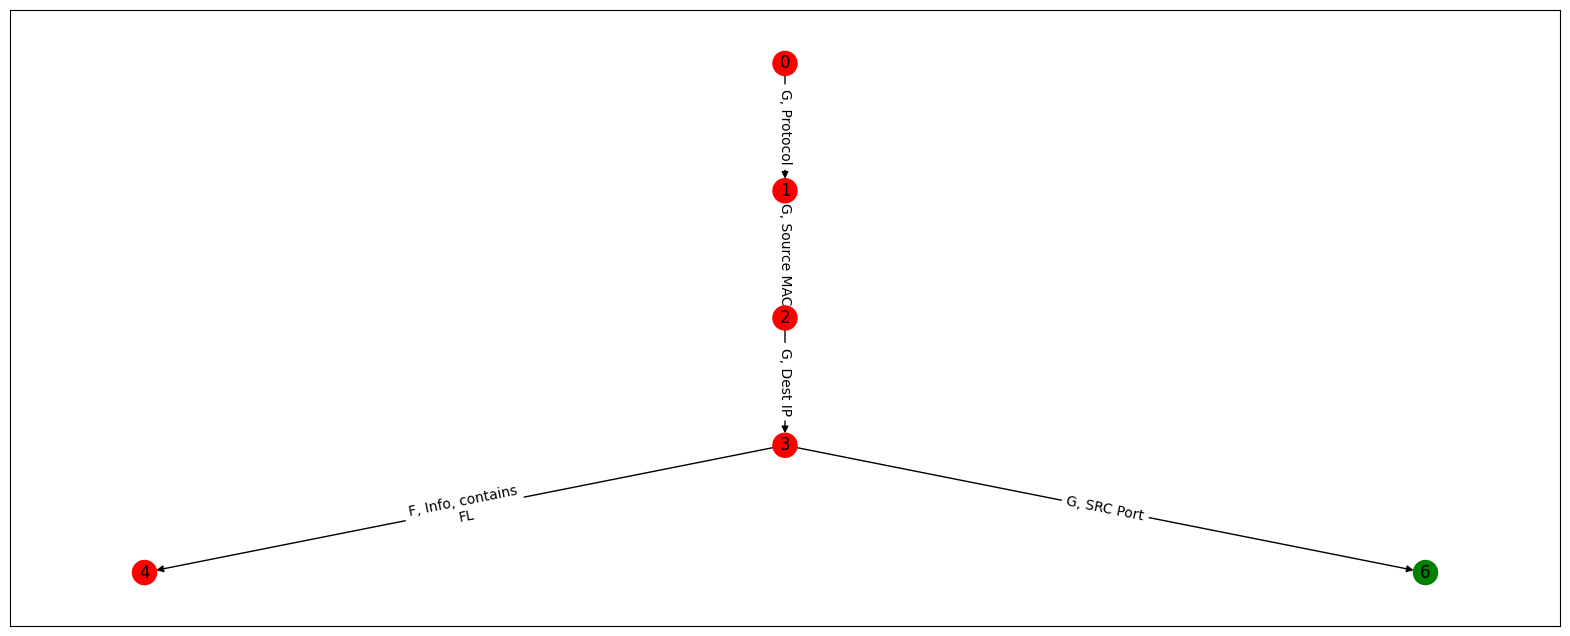

packet_number
highest_layer eth_src           ip_dst        tcp_srcport               
ARP           00:0c:29:54:bf:79 0.0.0.0       -1                       2
              00:26:b9:2b:0b:59 0.0.0.0       -1                       2
ICMP          00:0c:29:54:bf:79 1.2.3.4       -1                       1
                                82.108.0.109  -1                       2
                                82.108.0.11   -1                       1
...                                                                  ...
TCP           00:0c:29:54:bf:79 82.108.97.145  1138                    2
                                82.108.99.209  1063                    3
                                               1079                    3
              00:26:b9:2b:0b:59 192.168.1.122  139                   304
                                               445                   135

[3901 rows x 1 columns]


Total Reward: 18.56
Average Reward per Step: inf

Session Group-heavy complete!

Analyzing: Filter-first



/var/folders/nq/v_7l2dgx4m301tz6hhh7wz7h0000gn/T/ipykernel_61022/984655745.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Average Reward per Step: {total_reward / len(info_hist):.2f}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/nq/v_7l2dgx4m301tz6hhh7wz7h0000gn/T/ipykernel_61022/984655745.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  'avg_reward': total_reward / len(info_hist)
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: 

,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream
0,0,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,TCP,8888?34374 [ACK] Seq=1 Ack=1 Win=65535 Len=0 T...,192.168.1.1,192.168.1.122,66,2013-06-02 10:19:14,34374,8888,0
1,1,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=256/1, ttl...",1.2.3.4,192.168.1.122,74,2013-06-02 10:19:15,-1,-1,-1
2,2,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=512/2, ttl...",82.108.24.168,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
3,3,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=768/3, ttl...",82.108.25.192,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
4,4,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=1024/4, tt...",82.108.6.189,192.168.1.122,75,2013-06-02 10:19:19,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8643,8643,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33308/7298...",192.168.1.122,82.108.202.221,75,2013-06-02 10:21:14,-1,-1,-1
8644,8644,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34332/7302...",82.108.215.38,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1
8645,8645,00:0c:29:54:bf:79,00:26:b9:2b:0b:59,ICMP,"Echo (ping) reply id=0x0200, seq=33820/7300...",192.168.1.122,82.108.105.149,75,2013-06-02 10:21:14,-1,-1,-1
8646,8646,00:26:b9:2b:0b:59,00:0c:29:54:bf:79,ICMP,"Echo (ping) request id=0x0200, seq=34588/7303...",82.108.105.149,192.168.1.122,75,2013-06-02 10:21:14,-1,-1,-1


🔧 Diversity coefficient applied (main calc): 2.0
🔧 KL coefficient applied: 1.5
🎯 MASTER-EXACT REWARD:
   action_type: 1
   kl_distance: 1.2263617142904655
   compaction_gain: 0
   total_interestingness: 1.2263617142904655
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


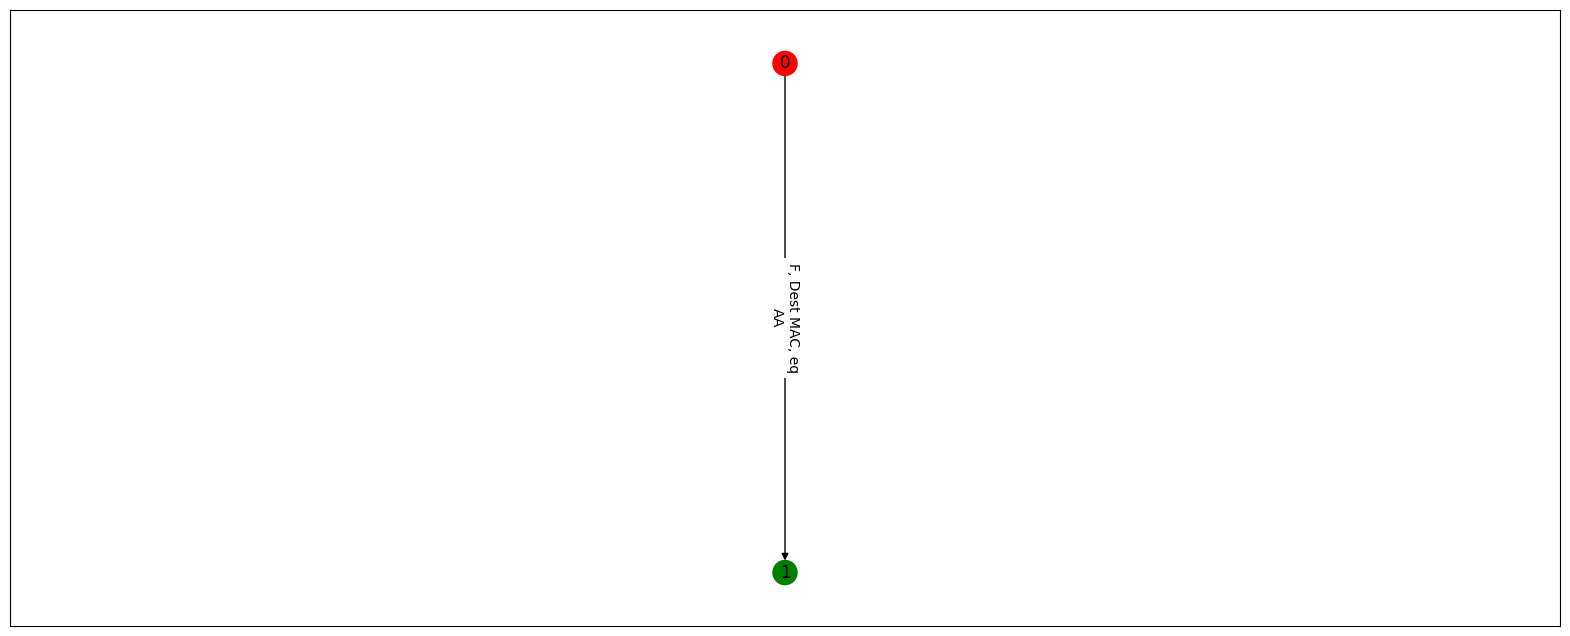

,packet_number,eth_dst,eth_src,highest_layer,info_line,ip_dst,ip_src,length,sniff_timestamp,tcp_dstport,tcp_srcport,tcp_stream


🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.00040677626584808467
   total_interestingness: 0.00040677626584808467
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


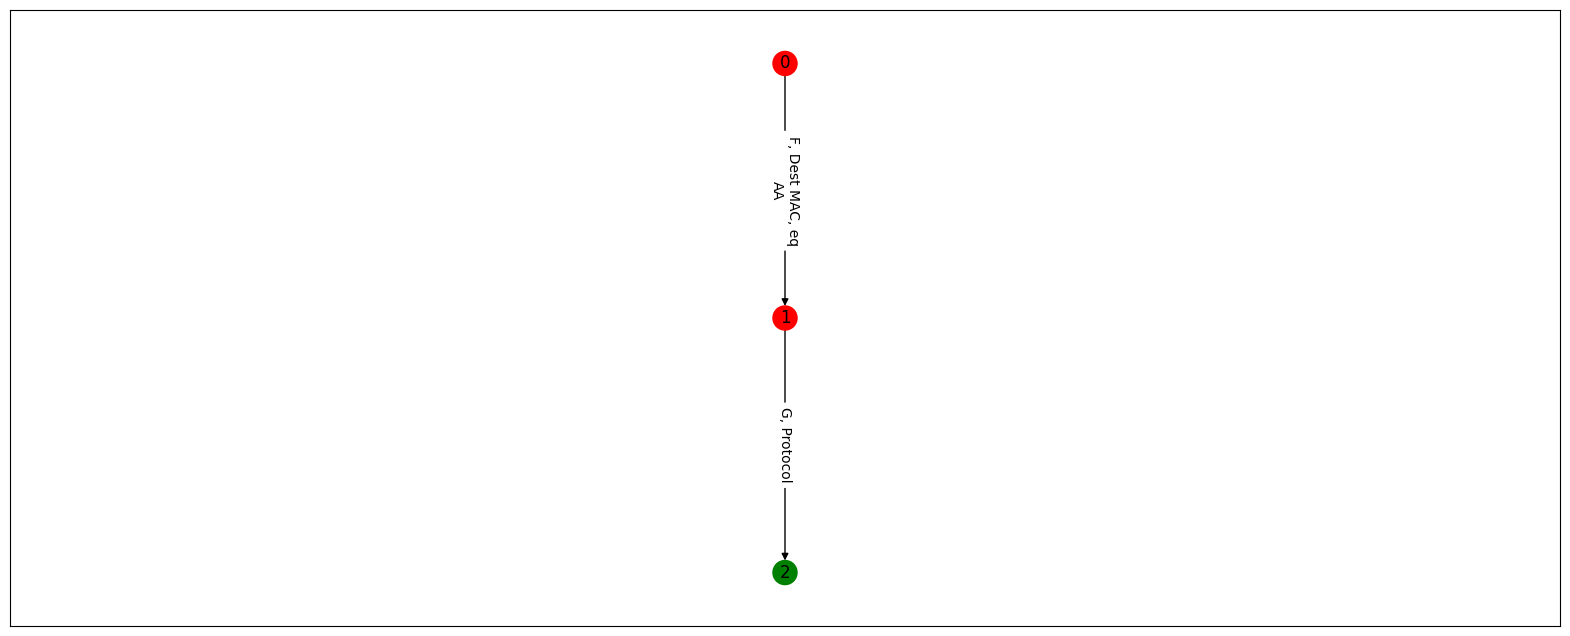

,packet_number
highest_layer,


🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 0.00040677626584808467
   total_interestingness: 0.00040677626584808467
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


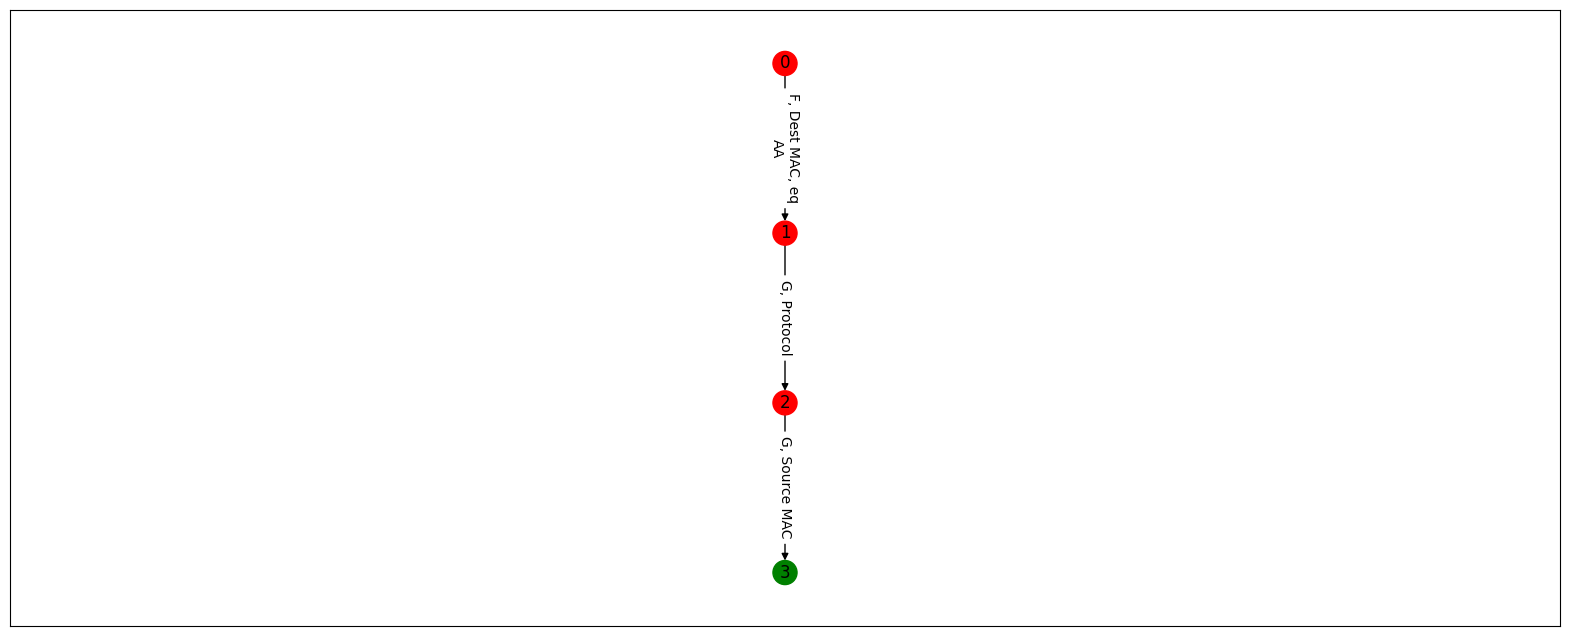

,,packet_number
highest_layer,eth_src,


🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔄 BACK ACTION: humanity rewards only
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000


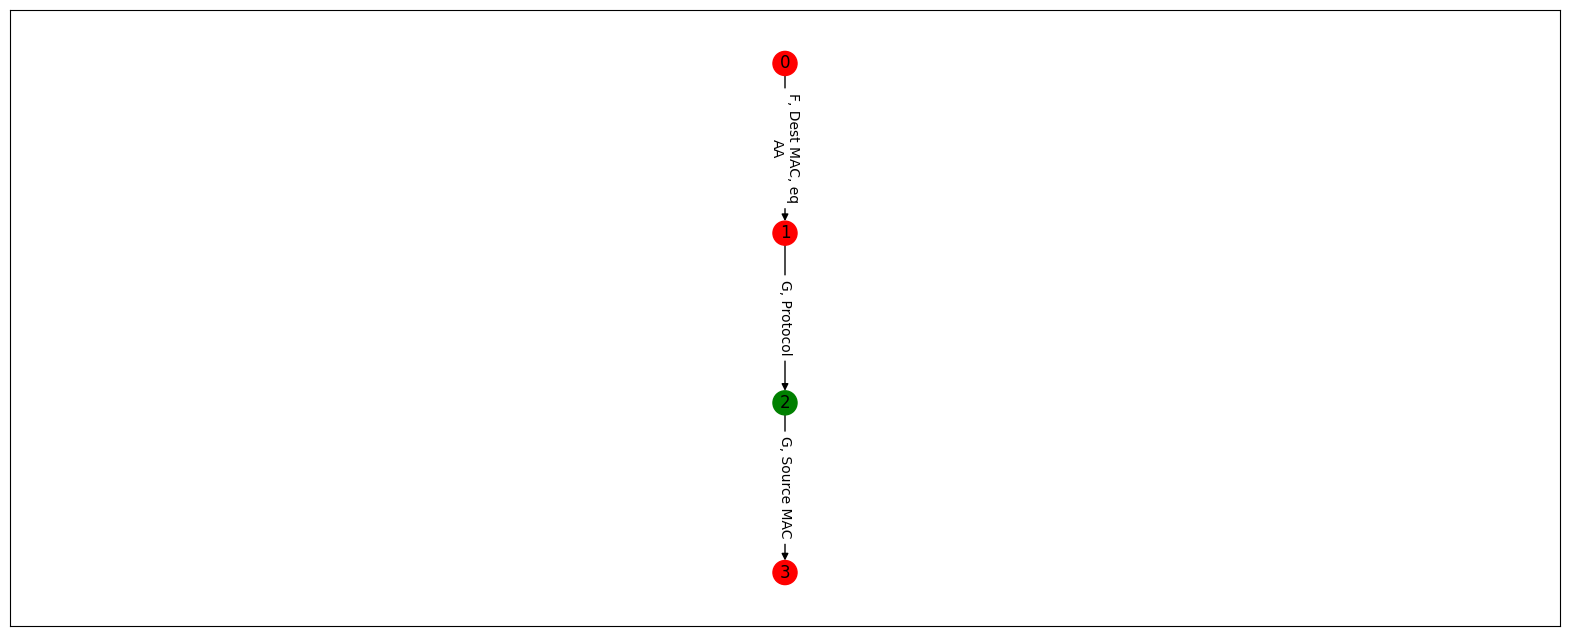

INFO:atena_env_cont:actions:[[np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(8), np.int64(0), np.int64(0), np.int64(0)]]


🔧 Humanity coefficient applied (same display penalty): 1.0
🚨 MASTER-EXACT: Skipping interestingness & humanity due to same display penalty
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=0.000000
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=0.000000
🎯 Snorkel humanity: 0.000000


🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.500, std=0.000


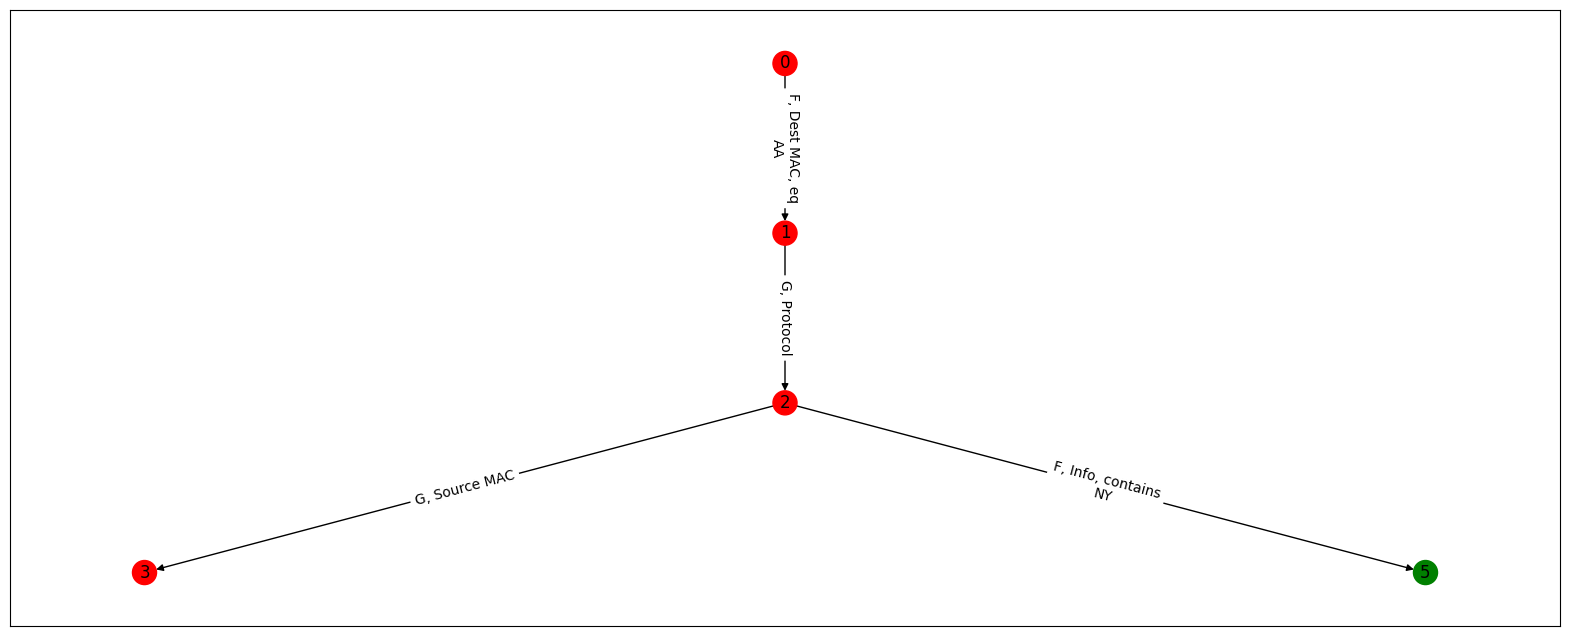

,packet_number
highest_layer,



Total Reward: -4.21
Average Reward per Step: -inf

Session Filter-first complete!


SUMMARY OF ALL SESSIONS



/var/folders/nq/v_7l2dgx4m301tz6hhh7wz7h0000gn/T/ipykernel_61022/984655745.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Average Reward per Step: {total_reward / len(info_hist):.2f}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/nq/v_7l2dgx4m301tz6hhh7wz7h0000gn/T/ipykernel_61022/984655745.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  'avg_reward': total_reward / len(info_hist)


,session_name,num_steps,total_reward,avg_reward
0,Group-heavy,0,18.557480,inf
1,Filter-first,0,-4.212825,-inf


In [ ]:
all_results = []

for session in sessions:
    print(f"\n{'='*70}")
    print(f"Analyzing: {session['name']}")
    print(f"{'='*70}\n")
    
    # Run the session
    info_hist, total_reward = run_human_session(
        env, 
        session['actions'], 
        dataset_number,
        filter_terms_lst=session['filters'],
        verbose=True
    )
    
    print(f"\nTotal Reward: {total_reward:.2f}")
    print(f"Average Reward per Step: {total_reward / len(info_hist):.2f}")
    
    # Analyze rewards
    actions_lst = info_hist_to_raw_actions_lst(info_hist)
    summary_reward_data = {
        'total_reward': [],
        'avg_reward_per_action': [],
        'avg_reward_per_non_back_action': [],
        'num_of_actions': []
    }
    
    reward_df = analyze_reward(info_hist, actions_lst, summary_reward_data, verbose=False)
    
    all_results.append({
        'session_name': session['name'],
        'num_steps': len(info_hist),
        'total_reward': total_reward,
        'avg_reward': total_reward / len(info_hist)
    })
    
    print(f"\nSession {session['name']} complete!")

# Summary
print(f"\n\n{'='*70}")
print("SUMMARY OF ALL SESSIONS")
print(f"{'='*70}\n")
results_df = pd.DataFrame(all_results)
display(results_df)


## Detailed Analysis of Single Session

Pick one session and display its full trajectory.


In [ ]:
# Choose session to analyze
chosen_session = sessions[0]
print(f"Detailed Analysis of: {chosen_session['name']}\n")

# Run session again with full display
info_hist, total_reward = run_human_session(
    env, 
    chosen_session['actions'], 
    dataset_number,
    filter_terms_lst=chosen_session['filters'],
    verbose=False
)

# Display full trajectory
simulate(info_hist, displays=True, verbose=True)


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
INFO:atena_env_cont:actions:[[np.int64(2), np.int64(3), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(2), np.int64(5), np.int64(0), np.int64(0), np.int64(0), np.int64(0)], [np.int64(1), np.int64(4), np.int64(8), np.int64(0), np.int64(0), np.int64(0)], [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0

Detailed Analysis of: Group-heavy

🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.185, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_gain: 1.9806288470171391
   total_interestingness: 1.9806288470171391
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.185, std=0.000
🔧 BEFORE coeff: r_snorkel_humanity=-0.630195
🔧 Using current humanity_coeff: 1.0
🔧 AFTER coeff: r_snorkel_humanity=-0.630195
🎯 Snorkel humanity: -0.630195
🔧 Rule-based humanity coefficient applied: 1.0
🎯 Using REAL LabelModel.predict_proba() on (1, 51) matrix
✅ Real Snorkel predictions: mean=0.465, std=0.000
🔧 Diversity coefficient applied (main calc): 2.0
🔧 Compaction coefficient applied: 2.0
🎯 MASTER-EXACT REWARD:
   action_type: 2
   kl_distance: 0
   compaction_ga

## Compare with Agent's Actions

Load a trained agent and see what it would do on the same dataset.



In [ ]:
try:
    # Load trained model
    model_path = find_latest_trained_model()
    print(f"Using model: {model_path}\n")
    
    # Create agent - FIXED: Only valid parameters!
    agent = TFRecommenderAgent(
        model_path=model_path,
        dataset_number=dataset_number
    )
    
    # Run agent
    print("Running trained agent on the same dataset...\n")
    info_hist_agent, total_reward_agent = run_episode(
        agent=agent,
        dataset_number=dataset_number,
        env=agent.env
    )
    
    print(f"Agent Performance:")
    print(f"  Steps: {len(info_hist_agent)}")
    print(f"  Total Reward: {total_reward_agent:.2f}")
    print(f"  Avg Reward/Step: {total_reward_agent/len(info_hist_agent):.2f}")
    
    print(f"\n\nPredefined Sessions Performance:")
    display(results_df)
    
except FileNotFoundError:
    print("No trained model found. Skipping agent comparison.")


✅ Found latest model: results/0511-resumed/best_agent (best_agent)
Using model: results/0511-resumed/best_agent

🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  return super().find_class(module, name)
INFO:root:Computing O...


INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=95.914]
INFO:root:[10 epochs]: TRAIN:[loss=36.330]
INFO:root:[20 epochs]: TRAIN:[loss=12.299]
INFO:root:[30 epochs]: TRAIN:[loss=4.888]
INFO:root:[40 epochs]: TRAIN:[loss=5.023]
INFO:root:[50 epochs]: TRAIN:[loss=4.873]
INFO:root:[60 epochs]: TRAIN:[loss=4.448]
INFO:root:[70 epochs]: TRAIN:[loss=4.346]
INFO:root:[80 epochs]: TRAIN:[loss=4.353]
INFO:root:[90 epochs]: TRAIN:[loss=4.346]
INFO:root:Finished Training
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_snorkel/snorkel_compatibility.py:122: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespa

✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🔄 Initializing GaussianPolicy (continuous architecture)
🎯 CRITICAL FIX: Using ChainerRL-compatible bound_mean=True (master uses --bound-mean) and action_space bounds!
🔧 Fixing old snorkel.learning references in checkpoint...
✅ Successfully loaded Snorkel checkpoint with compatibility fixes
🔧 Initializing real LabelModel with checkpoint data...
   Fitting LabelModel with dummy data: L_train(100, 51), class_balance=[0.5, 0.5]


INFO:root:Estimating \mu...
INFO:root:[0 epochs]: TRAIN:[loss=98.849]
INFO:root:[10 epochs]: TRAIN:[loss=37.372]
INFO:root:[20 epochs]: TRAIN:[loss=11.820]
INFO:root:[30 epochs]: TRAIN:[loss=5.277]
INFO:root:[40 epochs]: TRAIN:[loss=5.989]
INFO:root:[50 epochs]: TRAIN:[loss=5.435]
INFO:root:[60 epochs]: TRAIN:[loss=4.931]
INFO:root:[70 epochs]: TRAIN:[loss=4.884]
INFO:root:[80 epochs]: TRAIN:[loss=4.887]
INFO:root:[90 epochs]: TRAIN:[loss=4.870]
INFO:root:Finished Training
/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/core.py:171: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(x)


✅ Real LabelModel initialized and ready for predictions!
✅ Loaded Snorkel model from snorkel_checkpoints
Enhanced ATENA Environment initialized with:
  - Rule-based humanity scoring: ✓
  - Enhanced diversity rewards: ✓
  - Detailed reward tracking: ✓
  - Max steps: 12
🏗️  Building networks...
✅ Networks built - Policy vars: 6, Value vars: 6
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=hidden_0, built=True>:

Layer 'hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=hidden_0, built=True>, <Dense name=hidden_1, built=True>, <Dense name=mean, built=True>]
⚠️ Failed to load .weights.h5 format: A total of 3 objects could not be loaded. Example error message for object <Dense name=v_hidden_0, built=True>:

Layer 'v_hidden_0' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 

/Users/edenmironi/Desktop/school/third year/Atena/ATENA-A-EDA/Compare/atena-tf 2/gym_atena/envs/atena_env_cont.py:1024: SyntaxWarning: invalid escape sequence '\g'
  '''


IndexError: index 3 is out of bounds for axis 0 with size 1